In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#To visualize the whole grid
pd.options.display.max_columns = 999
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading the data

In [4]:
customer = pd.read_csv("customer.csv")
customer['customer_country'] = customer['customer_country'].transform(lambda x: x.lower())
customer['customer_city'] = customer['customer_city'].transform(lambda x: x.lower())
customer.head()

,customer_id,card_type,card_id,mar_status,age,gender,customer_country,cr_lim_group,customer_city,customer_id_new,customer_uid
0,000971c8-8d73-482a-9cd1-16526f0f3e06,SILVER,47c5cea8-98d7-4d24-9472-83beaa3c7cd6,D,46,M,india,16688,hyderabad,10000140,547c7456-827c-4b55-b988-ca6bfa64baaa
1,000aad2a-720c-4480-978b-547f492e5399,PLATINUM,b9331e29-c053-4a0b-af1a-2cbfc43f61d0,S,58,F,india,7790,gurgaon,10000159,12ef8789-1d30-452c-9e66-54b3c5229ff1
2,000eb156-2d03-4950-adf2-84c6e98a8861,SILVER,245785c4-60c9-41b6-838d-a8d541c33734,D,41,M,india,21267,mumbai,10000227,a2ca19ea-0340-4010-ab63-af5ce26d2049
3,001ad67d-3895-4198-b88f-f1ecc1a9a407,SILVER,a75991ae-b451-4ab6-b938-0f9f05a15444,M,41,M,united arab emirates,7617,sharjah,10000430,e77290f3-f27d-4cf6-a5d2-780ed34cca1a
4,00256f79-83ea-4f80-b8a8-db3891838f11,PLATINUM,532fdfe6-249c-4c9c-87f4-0aa55fa25d1b,M,56,M,india,5000,faridabad,10000574,85e3e4de-e670-4ab8-9def-6fbe07a9ef8c


In [11]:
for col in customer.columns:
    print(col,":",len(customer[col].unique()))

customer_id : 20000
card_type : 4
card_id : 20000
mar_status : 3
age : 76
gender : 2
customer_country : 7
cr_lim_group : 9785
customer_city : 163
customer_id_new : 20000
customer_uid : 20000


In [4]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
customer_id         20000 non-null object
card_type           20000 non-null object
card_id             20000 non-null object
mar_status          20000 non-null object
age                 20000 non-null int64
gender              20000 non-null object
customer_country    20000 non-null object
cr_lim_group        20000 non-null int64
customer_city       20000 non-null object
customer_id_new     20000 non-null int64
customer_uid        20000 non-null object
dtypes: int64(3), object(8)
memory usage: 1.7+ MB


In [5]:
customer_new = customer[['customer_id', 'card_type', 'mar_status', 'age', 'gender', 'customer_country', 'cr_lim_group', 'customer_city']]
customer_new.head()

,customer_id,card_type,mar_status,age,gender,customer_country,cr_lim_group,customer_city
0,000971c8-8d73-482a-9cd1-16526f0f3e06,SILVER,D,46,M,india,16688,hyderabad
1,000aad2a-720c-4480-978b-547f492e5399,PLATINUM,S,58,F,india,7790,gurgaon
2,000eb156-2d03-4950-adf2-84c6e98a8861,SILVER,D,41,M,india,21267,mumbai
3,001ad67d-3895-4198-b88f-f1ecc1a9a407,SILVER,M,41,M,united arab emirates,7617,sharjah
4,00256f79-83ea-4f80-b8a8-db3891838f11,PLATINUM,M,56,M,india,5000,faridabad


In [12]:
transaction = pd.read_csv("transaction.csv")
transaction['tran_date'] = pd.to_datetime(transaction['tran_date'], utc=True)
# transaction['tran_date'] = transaction['tran_date'].dt.date
transaction['merchant_country'] = transaction['merchant_country'].transform(lambda x: x.lower())
transaction['merchant_city'] = transaction['merchant_city'].transform(lambda x: x.lower())
transaction.head()

,customer_id,tran_id,tran_date,tran_amount,merchant_name,merchant_country,merchant_city,mcc_code,card_id
0,000d7c0d-2664-4554-87de-dc50732b58bd,NaN,2019-01-16 00:00:00+00:00,56.92,Canon,india,ahmedabad,5251,039d6cd5-3fec-415b-b260-a74a9edfbfdd
1,000d7c0d-2664-4554-87de-dc50732b58bd,NaN,2019-06-03 00:00:00+00:00,46.54,National Super Market,india,pune,5251,039d6cd5-3fec-415b-b260-a74a9edfbfdd
2,000d7c0d-2664-4554-87de-dc50732b58bd,NaN,2019-02-15 00:00:00+00:00,23.75,Palette - Vivanta by Taj,india,bengaluru,1004,039d6cd5-3fec-415b-b260-a74a9edfbfdd
3,000d7c0d-2664-4554-87de-dc50732b58bd,NaN,2019-09-14 00:00:00+00:00,46.15,GREEN GOLD PROVISIONS STORE,india,hyderabad,5399,039d6cd5-3fec-415b-b260-a74a9edfbfdd
4,000d7c0d-2664-4554-87de-dc50732b58bd,NaN,2019-05-16 00:00:00+00:00,94.29,Gamevilla,india,dehradun,7841,039d6cd5-3fec-415b-b260-a74a9edfbfdd


In [13]:
len(transaction['mcc_code'].unique())

177

In [14]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1053789 entries, 0 to 1053788
Data columns (total 9 columns):
customer_id         1053789 non-null object
tran_id             0 non-null float64
tran_date           1053789 non-null datetime64[ns, UTC]
tran_amount         1053789 non-null float64
merchant_name       1053789 non-null object
merchant_country    1053789 non-null object
merchant_city       1053789 non-null object
mcc_code            1053789 non-null int64
card_id             1053789 non-null object
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(5)
memory usage: 72.4+ MB


In [15]:
for col in transaction.columns:
    print(col,":",len(transaction[col].unique()))

customer_id : 17383
tran_id : 1
tran_date : 327
tran_amount : 3144
merchant_name : 8822
merchant_country : 1
merchant_city : 180
mcc_code : 177
card_id : 17383


In [9]:
merchant_new = transaction[['mcc_code', 'merchant_city', 'merchant_country', 'merchant_name']]
merchant_new.head()

,mcc_code,merchant_city,merchant_country,merchant_name
0,5251,ahmedabad,india,Canon
1,5251,pune,india,National Super Market
2,1004,bengaluru,india,Palette - Vivanta by Taj
3,5399,hyderabad,india,GREEN GOLD PROVISIONS STORE
4,7841,dehradun,india,Gamevilla


# Combining customer and transaction data

In [16]:
train = pd.merge(transaction, customer, on=['customer_id', 'card_id'])
train.head()

,customer_id,tran_id,tran_date,tran_amount,merchant_name,merchant_country,merchant_city,mcc_code,card_id,card_type,mar_status,age,gender,customer_country,cr_lim_group,customer_city,customer_id_new,customer_uid
0,00015fc4-6fdc-4120-be42-a49e8bbe8cce,NaN,2019-03-20 00:00:00+00:00,31.25,The Jungle Terrace,india,bengaluru,5811,97c17dcc-4db8-4cb2-934d-a490ae51e1c7,PLATINUM,D,49,M,india,5000,bengaluru,10000020,e0430ada-2a60-491f-8229-c369bb2c5e38
1,00015fc4-6fdc-4120-be42-a49e8bbe8cce,NaN,2019-05-03 00:00:00+00:00,30.00,The Roost - Urban Bistro And Bar,india,delhi,5811,97c17dcc-4db8-4cb2-934d-a490ae51e1c7,PLATINUM,D,49,M,india,5000,bengaluru,10000020,e0430ada-2a60-491f-8229-c369bb2c5e38
2,00015fc4-6fdc-4120-be42-a49e8bbe8cce,NaN,2019-06-22 00:00:00+00:00,29.17,China Bowl,india,bengaluru,1004,97c17dcc-4db8-4cb2-934d-a490ae51e1c7,PLATINUM,D,49,M,india,5000,bengaluru,10000020,e0430ada-2a60-491f-8229-c369bb2c5e38
3,00015fc4-6fdc-4120-be42-a49e8bbe8cce,NaN,2019-07-22 00:00:00+00:00,21.67,87 - Premier Inn,india,bengaluru,1004,97c17dcc-4db8-4cb2-934d-a490ae51e1c7,PLATINUM,D,49,M,india,5000,bengaluru,10000020,e0430ada-2a60-491f-8229-c369bb2c5e38
4,00015fc4-6fdc-4120-be42-a49e8bbe8cce,NaN,2019-03-25 00:00:00+00:00,27.92,Empire Restaurant,india,bengaluru,1004,97c17dcc-4db8-4cb2-934d-a490ae51e1c7,PLATINUM,D,49,M,india,5000,bengaluru,10000020,e0430ada-2a60-491f-8229-c369bb2c5e38


In [60]:
# Finding the frequency
temp = train.groupby(["customer_id", "mcc_code", 'merchant_name']).size().reset_index(name="Frequency")
temp.head()

,customer_id,mcc_code,merchant_name,Frequency
0,00015fc4-6fdc-4120-be42-a49e8bbe8cce,1004,87 - Premier Inn,1
1,00015fc4-6fdc-4120-be42-a49e8bbe8cce,1004,Bengaluru Baking Company - JW Marriott,1
2,00015fc4-6fdc-4120-be42-a49e8bbe8cce,1004,China Bowl,1
3,00015fc4-6fdc-4120-be42-a49e8bbe8cce,1004,Empire Restaurant,1
4,00015fc4-6fdc-4120-be42-a49e8bbe8cce,1004,Hanoi,1


In [61]:
max(temp['Frequency'])

39

In [62]:
train = pd.merge(train, temp, on=['customer_id', 'mcc_code', 'merchant_name'])
train.head()

,customer_id,tran_id,tran_date,tran_amount,merchant_name,merchant_country,merchant_city,mcc_code,card_id,card_type,mar_status,age,gender,customer_country,cr_lim_group,customer_city,customer_id_new,customer_uid,Frequency
0,00015fc4-6fdc-4120-be42-a49e8bbe8cce,NaN,2019-03-20 00:00:00+00:00,31.25,The Jungle Terrace,india,bengaluru,5811,97c17dcc-4db8-4cb2-934d-a490ae51e1c7,PLATINUM,D,49,M,india,5000,bengaluru,10000020,e0430ada-2a60-491f-8229-c369bb2c5e38,1
1,00015fc4-6fdc-4120-be42-a49e8bbe8cce,NaN,2019-05-03 00:00:00+00:00,30.00,The Roost - Urban Bistro And Bar,india,delhi,5811,97c17dcc-4db8-4cb2-934d-a490ae51e1c7,PLATINUM,D,49,M,india,5000,bengaluru,10000020,e0430ada-2a60-491f-8229-c369bb2c5e38,1
2,00015fc4-6fdc-4120-be42-a49e8bbe8cce,NaN,2019-06-22 00:00:00+00:00,29.17,China Bowl,india,bengaluru,1004,97c17dcc-4db8-4cb2-934d-a490ae51e1c7,PLATINUM,D,49,M,india,5000,bengaluru,10000020,e0430ada-2a60-491f-8229-c369bb2c5e38,1
3,00015fc4-6fdc-4120-be42-a49e8bbe8cce,NaN,2019-07-22 00:00:00+00:00,21.67,87 - Premier Inn,india,bengaluru,1004,97c17dcc-4db8-4cb2-934d-a490ae51e1c7,PLATINUM,D,49,M,india,5000,bengaluru,10000020,e0430ada-2a60-491f-8229-c369bb2c5e38,1
4,00015fc4-6fdc-4120-be42-a49e8bbe8cce,NaN,2019-03-25 00:00:00+00:00,27.92,Empire Restaurant,india,bengaluru,1004,97c17dcc-4db8-4cb2-934d-a490ae51e1c7,PLATINUM,D,49,M,india,5000,bengaluru,10000020,e0430ada-2a60-491f-8229-c369bb2c5e38,1


In [63]:
test = train.copy()

In [64]:
train.shape

(714431, 19)

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714431 entries, 0 to 714430
Data columns (total 18 columns):
customer_id         714431 non-null object
tran_id             0 non-null float64
tran_date           714431 non-null datetime64[ns, UTC]
tran_amount         714431 non-null float64
merchant_name       714431 non-null object
merchant_country    714431 non-null object
merchant_city       714431 non-null object
mcc_code            714431 non-null int64
card_id             714431 non-null object
card_type           714431 non-null object
mar_status          714431 non-null object
age                 714431 non-null int64
gender              714431 non-null object
customer_country    714431 non-null object
cr_lim_group        714431 non-null int64
customer_city       714431 non-null object
customer_id_new     714431 non-null int64
customer_uid        714431 non-null object
dtypes: datetime64[ns, UTC](1), float64(2), int64(4), object(11)
memory usage: 103.6+ MB


In [15]:
train.dtypes

customer_id                      object
tran_id                         float64
tran_date           datetime64[ns, UTC]
tran_amount                     float64
merchant_name                    object
merchant_country                 object
merchant_city                    object
mcc_code                          int64
card_id                          object
card_type                        object
mar_status                       object
age                               int64
gender                           object
customer_country                 object
cr_lim_group                      int64
customer_city                    object
customer_id_new                   int64
customer_uid                     object
Frequency                         int64
dtype: object

In [18]:
#dropping unnecessary columns
train = train.drop(columns=['customer_id_new', 'tran_id', 'card_id', 'tran_amount',
                            'merchant_name', 'customer_uid'], axis=1)

In [19]:
train.dtypes

customer_id                      object
tran_date           datetime64[ns, UTC]
merchant_country                 object
merchant_city                    object
mcc_code                          int64
card_type                        object
mar_status                       object
age                               int64
gender                           object
customer_country                 object
cr_lim_group                      int64
customer_city                    object
dtype: object

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714431 entries, 0 to 714430
Data columns (total 12 columns):
customer_id         714431 non-null object
tran_date           714431 non-null datetime64[ns, UTC]
merchant_country    714431 non-null object
merchant_city       714431 non-null object
mcc_code            714431 non-null int64
card_type           714431 non-null object
mar_status          714431 non-null object
age                 714431 non-null int64
gender              714431 non-null object
customer_country    714431 non-null object
cr_lim_group        714431 non-null int64
customer_city       714431 non-null object
dtypes: datetime64[ns, UTC](1), int64(3), object(8)
memory usage: 70.9+ MB


In [67]:
train.describe()

,mcc_code,age,cr_lim_group,Frequency
count,714431.000000,714431.000000,714431.000000,714431.000000
mean,5009.486055,44.293431,14554.651527,2.526846
std,1622.924810,10.004789,12642.007450,2.902933
min,1001.000000,3.000000,5000.000000,1.000000
25%,3749.000000,38.000000,5000.000000,1.000000
50%,5499.000000,44.000000,8076.000000,1.000000
75%,5813.000000,51.000000,21262.000000,3.000000
max,7999.000000,84.000000,84685.000000,39.000000


# Exploratory Data Analysis

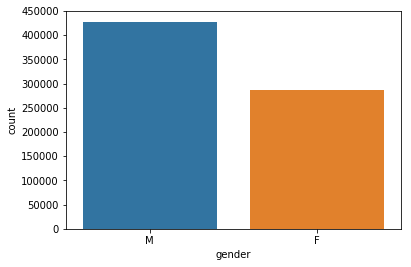

In [19]:
sns.countplot(train.gender)

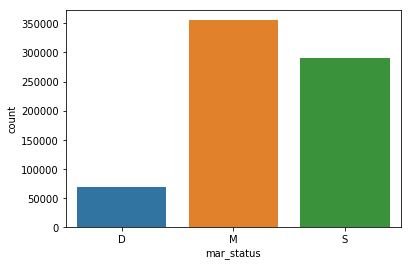

In [20]:
sns.countplot(train.mar_status)

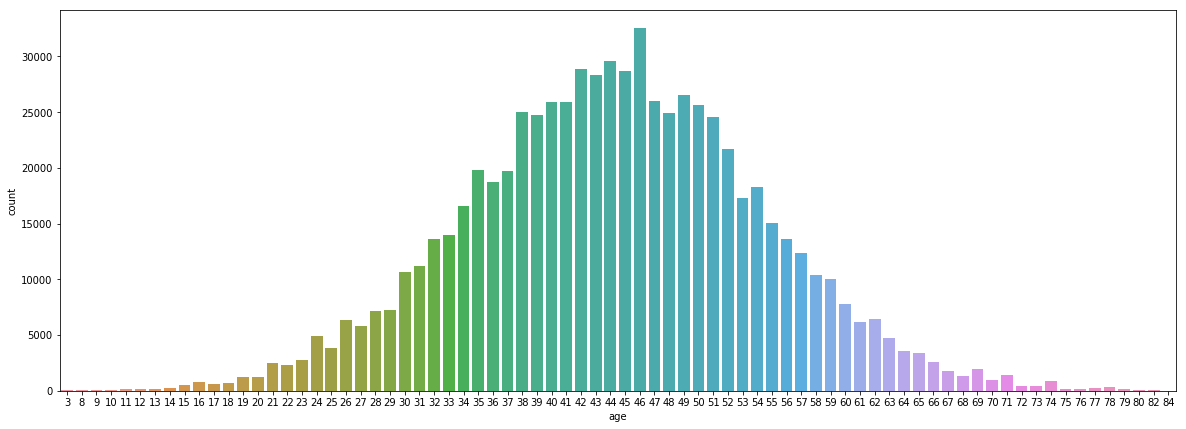

In [21]:
plt.figure(figsize=(20,7))
sns.countplot(train.age)

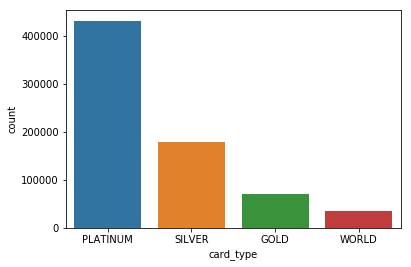

In [22]:
sns.countplot(train.card_type)

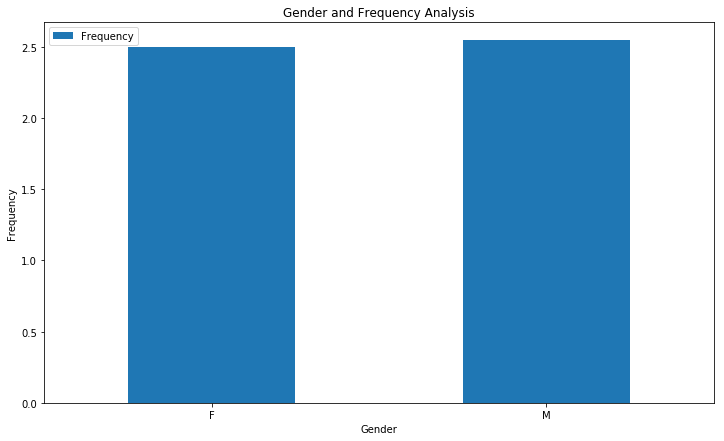

In [23]:
# Bivariate Analysis
Gender_pivot = train.pivot_table(index='gender', values="Frequency", aggfunc=np.mean)
Gender_pivot.plot(kind='bar',figsize=(12,7))
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.title("Gender and Frequency Analysis")
plt.xticks(rotation=0)
plt.show()

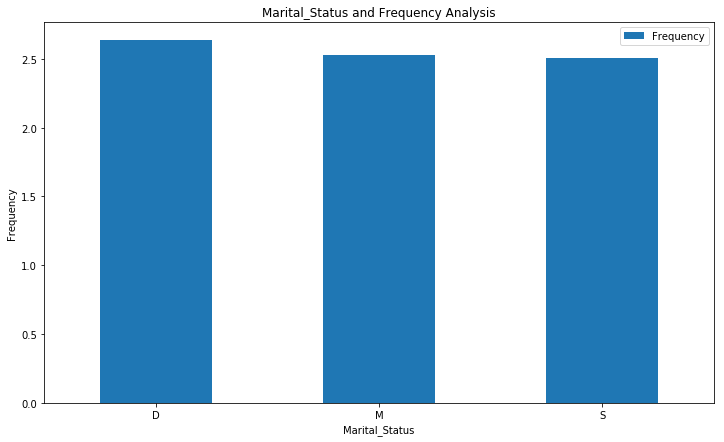

In [24]:
Marital_pivot = train.pivot_table(index='mar_status', values="Frequency", aggfunc=np.mean)
Marital_pivot.plot(kind='bar',figsize=(12,7))
plt.xlabel("Marital_Status")
plt.ylabel("Frequency")
plt.title("Marital_Status and Frequency Analysis")
plt.xticks(rotation=0)
plt.show()

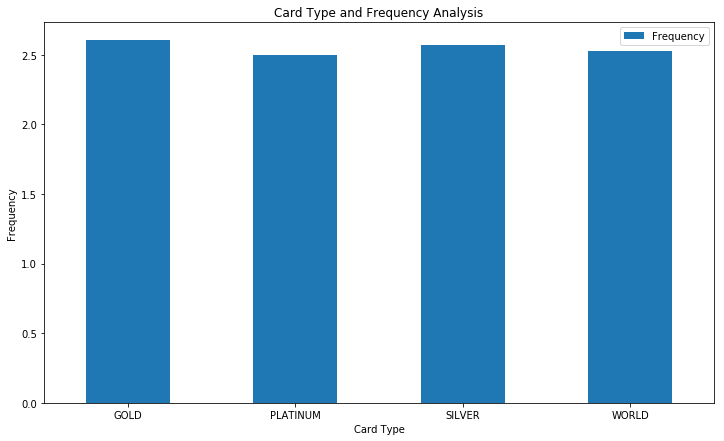

In [25]:
card_pivot = train.pivot_table(index='card_type', values="Frequency", aggfunc=np.mean)
card_pivot.plot(kind='bar',figsize=(12,7))
plt.xlabel("Card Type")
plt.ylabel("Frequency")
plt.title("Card Type and Frequency Analysis")
plt.xticks(rotation=0)
plt.show()

In [26]:
# correlation matrix
corr = train.corr()
print (corr["Frequency"].sort_values(ascending=False))

Frequency       1.000000
cr_lim_group    0.002995
age            -0.002447
mcc_code       -0.249027
Name: Frequency, dtype: float64


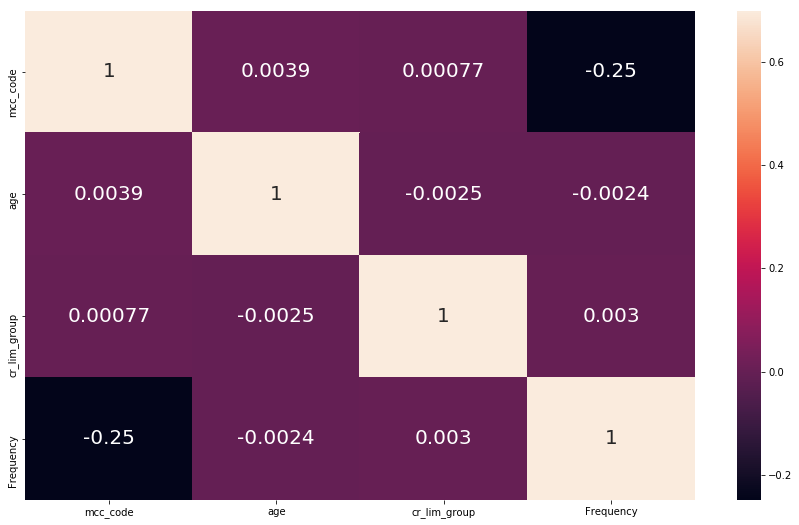

In [27]:
#correlation matrix
f, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(corr, vmax=.7,annot_kws={'size': 20}, annot=True)

# Creation of new attributes

In [68]:
train['month'] = train['tran_date'].dt.month
train['weekday'] = train['tran_date'].dt.dayofweek
train['day'] = train['tran_date'].dt.day
train.head()

,customer_id,tran_date,merchant_country,merchant_city,mcc_code,card_type,mar_status,age,gender,customer_country,cr_lim_group,customer_city,Frequency,month,weekday,day
0,00015fc4-6fdc-4120-be42-a49e8bbe8cce,2019-03-20 00:00:00+00:00,india,bengaluru,5811,PLATINUM,D,49,M,india,5000,bengaluru,1,3,2,20
1,00015fc4-6fdc-4120-be42-a49e8bbe8cce,2019-05-03 00:00:00+00:00,india,delhi,5811,PLATINUM,D,49,M,india,5000,bengaluru,1,5,4,3
2,00015fc4-6fdc-4120-be42-a49e8bbe8cce,2019-06-22 00:00:00+00:00,india,bengaluru,1004,PLATINUM,D,49,M,india,5000,bengaluru,1,6,5,22
3,00015fc4-6fdc-4120-be42-a49e8bbe8cce,2019-07-22 00:00:00+00:00,india,bengaluru,1004,PLATINUM,D,49,M,india,5000,bengaluru,1,7,0,22
4,00015fc4-6fdc-4120-be42-a49e8bbe8cce,2019-03-25 00:00:00+00:00,india,bengaluru,1004,PLATINUM,D,49,M,india,5000,bengaluru,1,3,0,25


In [69]:
train['change_city'] = train['merchant_city']==train['customer_city']
train['change_country'] = train['merchant_country']==train['customer_country']

In [70]:
dic = {True:0, False:1}
train['change_city'] = train['change_city'].apply(lambda x: dic[x])
train['change_country'] = train['change_country'].apply(lambda x: dic[x])

In [71]:
train.head()

,customer_id,tran_date,merchant_country,merchant_city,mcc_code,card_type,mar_status,age,gender,customer_country,cr_lim_group,customer_city,Frequency,month,weekday,day,change_city,change_country
0,00015fc4-6fdc-4120-be42-a49e8bbe8cce,2019-03-20 00:00:00+00:00,india,bengaluru,5811,PLATINUM,D,49,M,india,5000,bengaluru,1,3,2,20,0,0
1,00015fc4-6fdc-4120-be42-a49e8bbe8cce,2019-05-03 00:00:00+00:00,india,delhi,5811,PLATINUM,D,49,M,india,5000,bengaluru,1,5,4,3,1,0
2,00015fc4-6fdc-4120-be42-a49e8bbe8cce,2019-06-22 00:00:00+00:00,india,bengaluru,1004,PLATINUM,D,49,M,india,5000,bengaluru,1,6,5,22,0,0
3,00015fc4-6fdc-4120-be42-a49e8bbe8cce,2019-07-22 00:00:00+00:00,india,bengaluru,1004,PLATINUM,D,49,M,india,5000,bengaluru,1,7,0,22,0,0
4,00015fc4-6fdc-4120-be42-a49e8bbe8cce,2019-03-25 00:00:00+00:00,india,bengaluru,1004,PLATINUM,D,49,M,india,5000,bengaluru,1,3,0,25,0,0


# Analysis on Time data

[Text(0.5,1,'Frequency on monthly basis')]

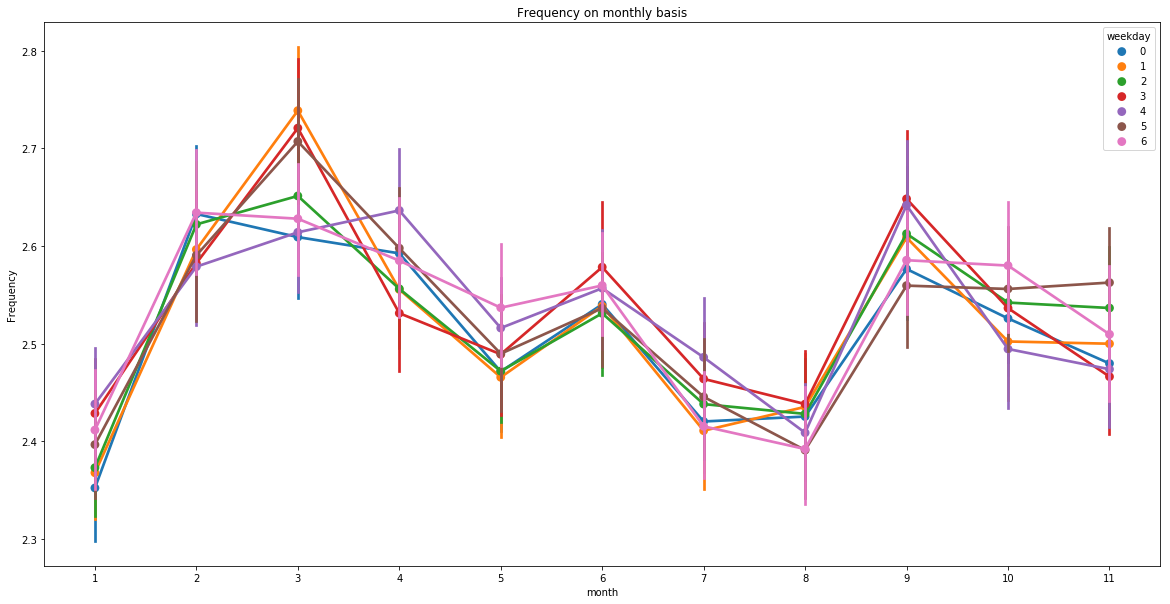

In [32]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=train[['month',
                       'Frequency',
                       'weekday']],
            x='month', y='Frequency',
            hue='weekday', ax=ax)
ax.set(title="Frequency on monthly basis")

[Text(0.5,1,'Frequency on weekly basis')]

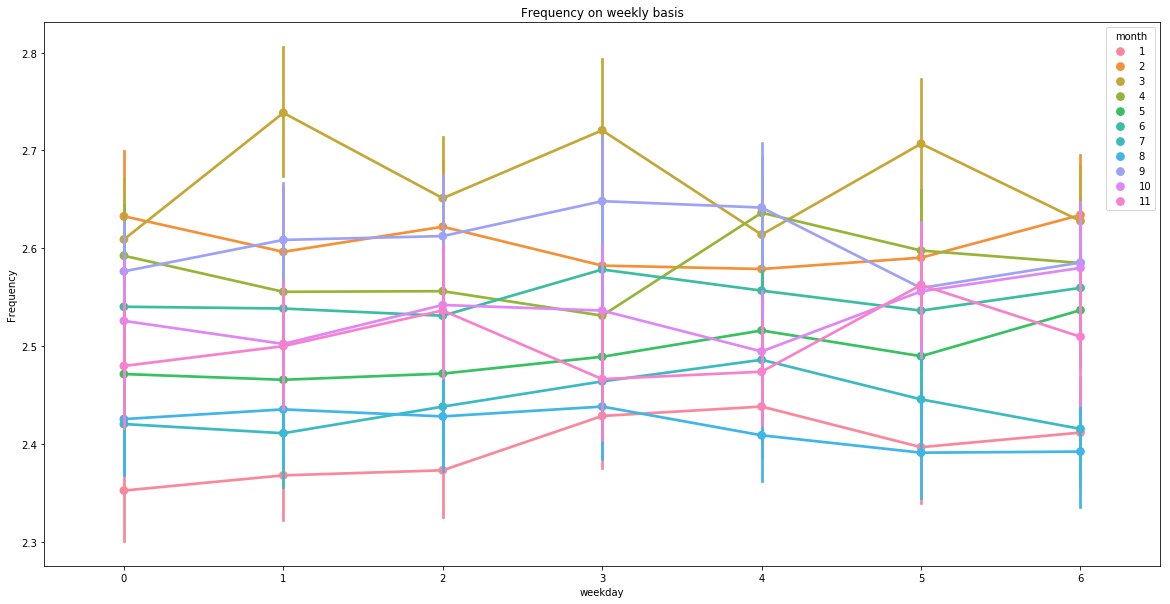

In [33]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=train[['month',
                       'Frequency',
                       'weekday']],
            x='weekday', y='Frequency',
            hue='month', ax=ax)
ax.set(title="Frequency on weekly basis")

[Text(0.5,1,'Frequency based on card type')]

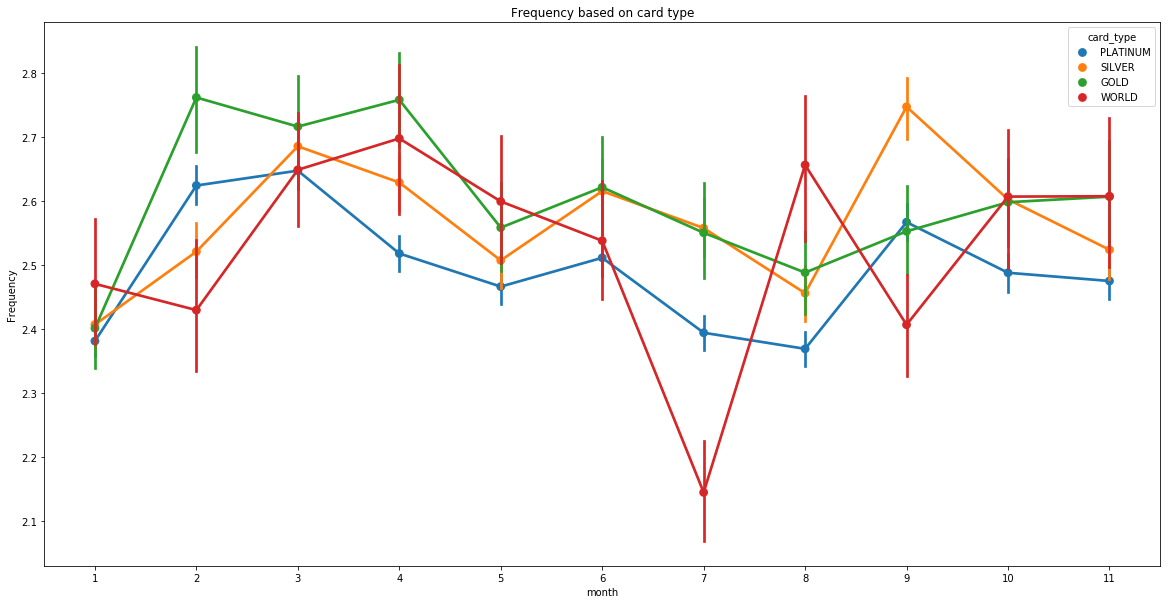

In [34]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=train[['month',
                       'Frequency',
                       'card_type']],
            x='month', y='Frequency',
            hue='card_type', ax=ax)
ax.set(title="Frequency based on card type")

[Text(0.5,1,'Frequency based on marital status')]

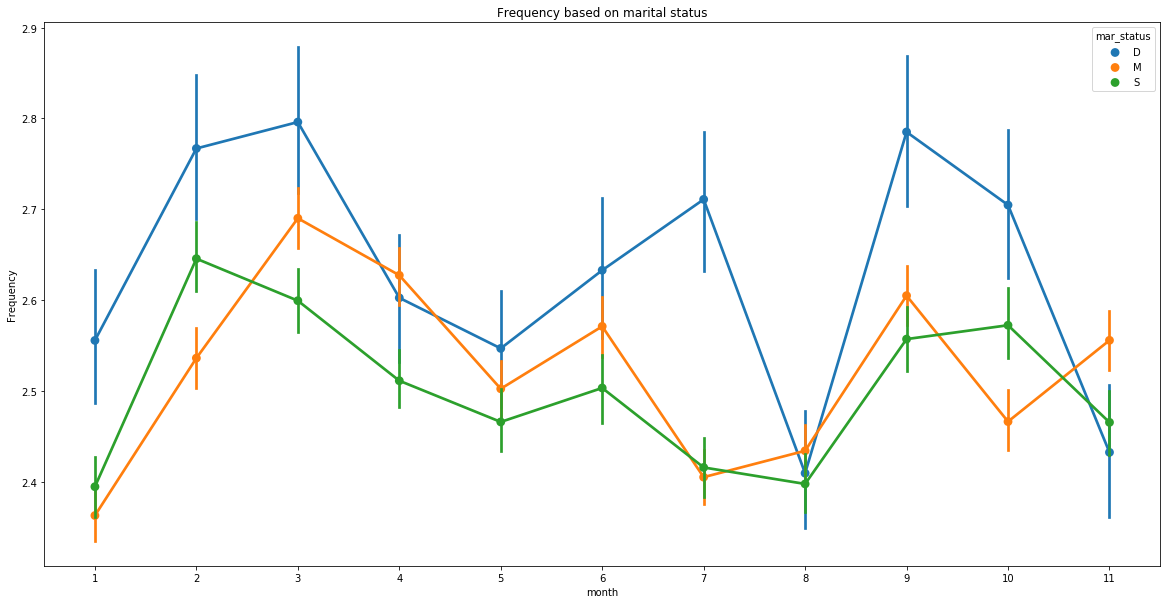

In [35]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=train[['month',
                       'Frequency',
                       'mar_status']],
            x='month', y='Frequency',
            hue='mar_status', ax=ax)
ax.set(title="Frequency based on marital status")

[Text(0.5,1,'Frequency based on gender')]

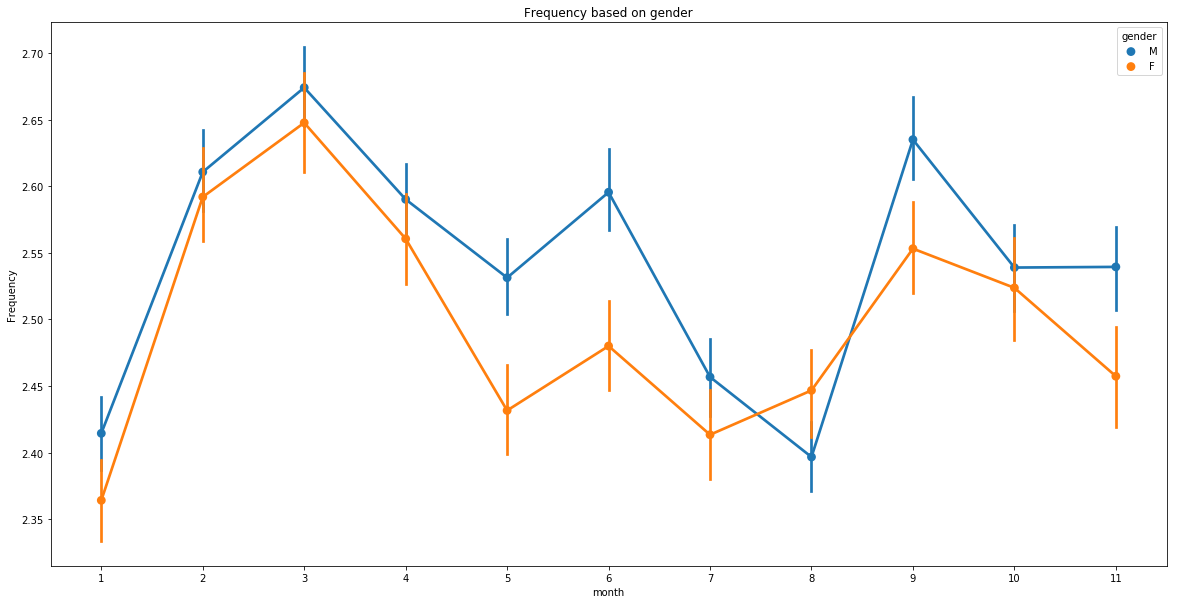

In [36]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=train[['month',
                       'Frequency',
                       'gender']],
            x='month', y='Frequency',
            hue='gender', ax=ax)
ax.set(title="Frequency based on gender")

[Text(0.5,1,'Frequency based on change of city')]

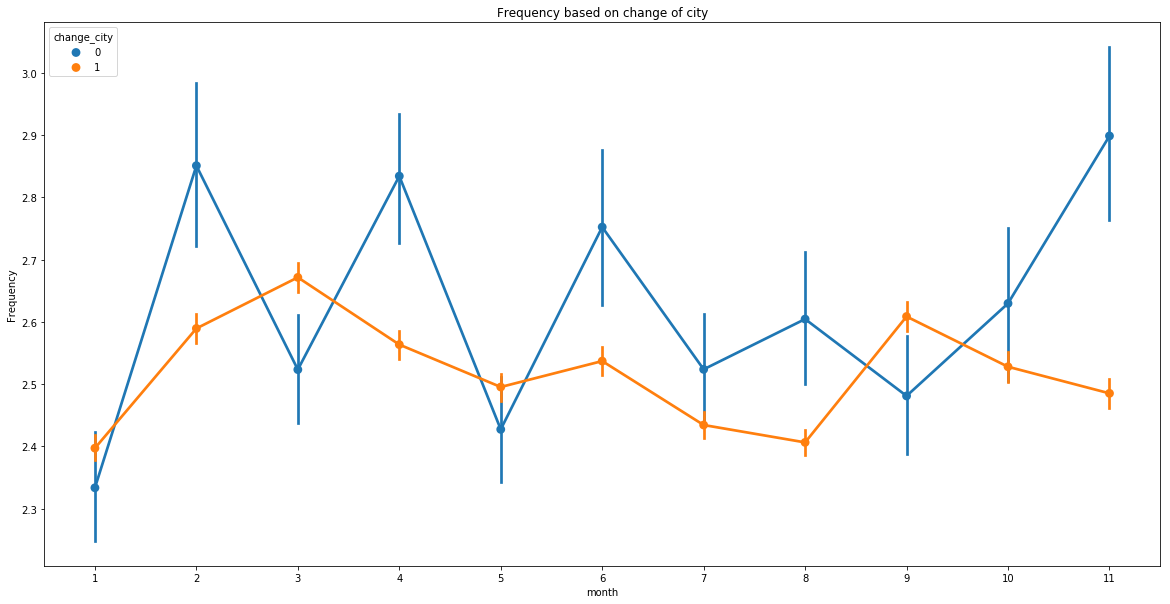

In [37]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=train[['month',
                       'Frequency',
                       'change_city']],
            x='month', y='Frequency',
            hue='change_city', ax=ax)
ax.set(title="Frequency based on change of city")

# Data normalization

Text(0.5,1,'Frequency Distribution')

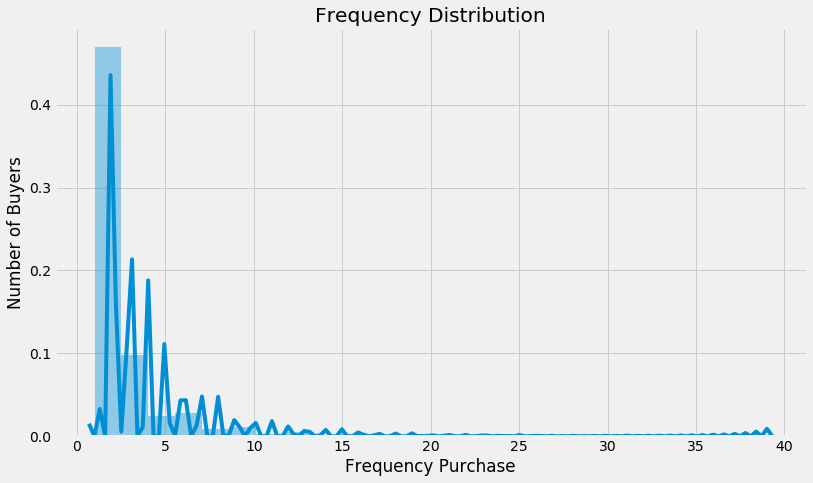

In [38]:
# Plotting histogram for Frequency
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12,7))
sns.distplot(train.Frequency, bins = 25)
plt.xlabel("Frequency Purchase")
plt.ylabel("Number of Buyers")
plt.title("Frequency Distribution")

In [72]:
# import math
# train['Frequency'] = train['Frequency'].apply(lambda x: math.log(x))
max_value_freq = train['Frequency'].max()
min_value_freq = train['Frequency'].min()
train['Frequency'] = (train['Frequency'] - min_value_freq) / (max_value_freq - min_value_freq)

Text(0.5,1,'Frequency Distribution')

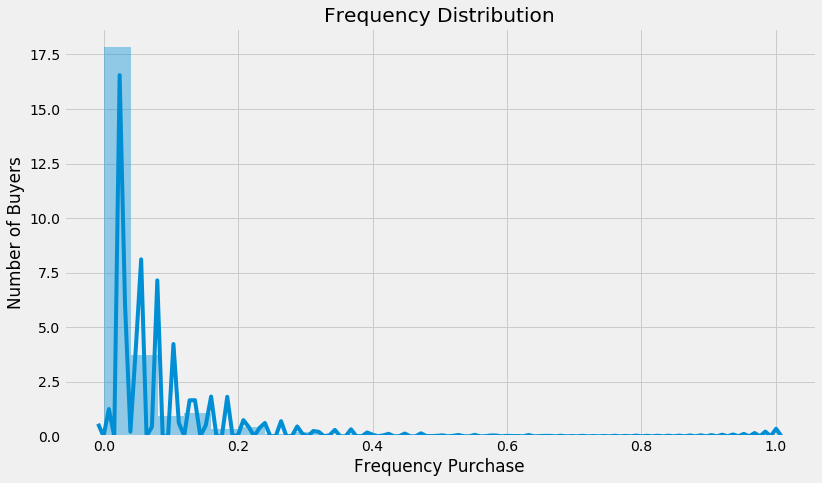

In [40]:
# Plotting histogram for Frequency
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12,7))
sns.distplot(train.Frequency, bins = 25)
plt.xlabel("Frequency Purchase")
plt.ylabel("Number of Buyers")
plt.title("Frequency Distribution")

Text(0.5,1,'Credit limit Distribution')

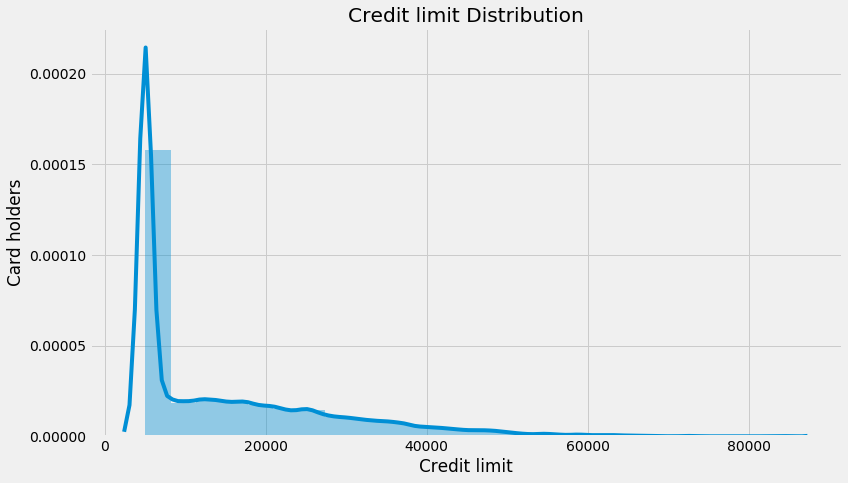

In [41]:
# Plotting histogram for purchase
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12,7))
sns.distplot(train.cr_lim_group, bins = 25)
plt.xlabel("Credit limit")
plt.ylabel("Card holders")
plt.title("Credit limit Distribution")

In [73]:
# import math
# train['cr_lim_group'] = train['cr_lim_group'].apply(lambda x: math.log(x))
max_value = train['cr_lim_group'].max()
min_value = train['cr_lim_group'].min()
train['cr_lim_group'] = (train['cr_lim_group'] - min_value) / (max_value - min_value)

Text(0.5,1,'Credit limit Distribution')

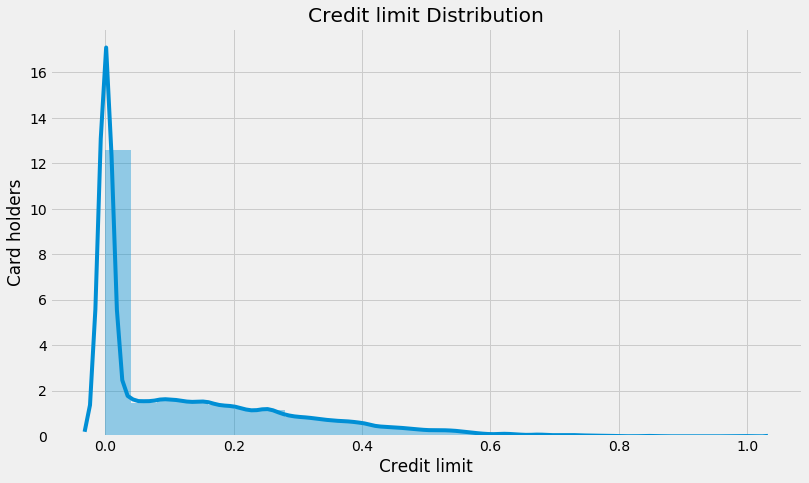

In [43]:
# Plotting histogram for purchase
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12,7))
sns.distplot(train.cr_lim_group, bins = 25)
plt.xlabel("Credit limit")
plt.ylabel("Card holders")
plt.title("Credit limit Distribution")

In [44]:
train.dtypes

customer_id                      object
tran_date           datetime64[ns, UTC]
merchant_country                 object
merchant_city                    object
mcc_code                          int64
card_type                        object
mar_status                       object
age                               int64
gender                           object
customer_country                 object
cr_lim_group                    float64
customer_city                    object
Frequency                       float64
month                             int64
weekday                           int64
day                               int64
change_city                       int64
change_country                    int64
dtype: object

In [74]:
# dropping unnecessary columns
train = train.drop(columns=['customer_id', 'tran_date', 'merchant_country', 'merchant_city', 'customer_country', 'customer_city', 'month'], axis=1)

# Converting categorical attributes

In [75]:
cols = ['mar_status', 'card_type', 'gender']
for column in cols:
    train = pd.concat([train, pd.get_dummies(train[column], prefix=column, drop_first=True)],axis=1)
    train = train.drop([column], axis=1)

In [76]:
train.head()

,mcc_code,age,cr_lim_group,Frequency,weekday,day,change_city,change_country,mar_status_M,mar_status_S,card_type_PLATINUM,card_type_SILVER,card_type_WORLD,gender_M
0,5811,49,0.0,0.0,2,20,0,0,0,0,1,0,0,1
1,5811,49,0.0,0.0,4,3,1,0,0,0,1,0,0,1
2,1004,49,0.0,0.0,5,22,0,0,0,0,1,0,0,1
3,1004,49,0.0,0.0,0,22,0,0,0,0,1,0,0,1
4,1004,49,0.0,0.0,0,25,0,0,0,0,1,0,0,1


# Training the models

# Regression

Using the regression model, predict the frequency of the transaction

In [48]:
X = train.drop(columns=['Frequency', 'weekday', 'day'], axis=1)
y = train['Frequency']

In [49]:
from sklearn import cross_validation, metrics
def modelfit(alg, x, y):
    #Fit the algorithm on the data
    alg.fit(x, y)
        
    #Predict training set:
    dtrain_predictions = alg.predict(x)

    #Perform cross-validation:
    cv_score = cross_validation.cross_val_score(alg, x, y, cv=20, scoring='mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y.values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\sit


Model Report
RMSE : 0.07397
CV Score : Mean - 0.07381 | Std - 0.005262 | Min - 0.06537 | Max - 0.08834


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


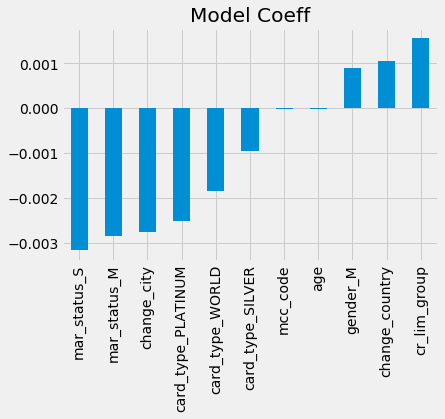

In [50]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression()
modelfit(model, X, y)
coef = pd.Series(model.coef_,X.columns).sort_values()
coef.plot(kind="bar", title="Model Coeff")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\sit


Model Report
RMSE : 0.07397
CV Score : Mean - 0.07381 | Std - 0.005262 | Min - 0.06537 | Max - 0.08834


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


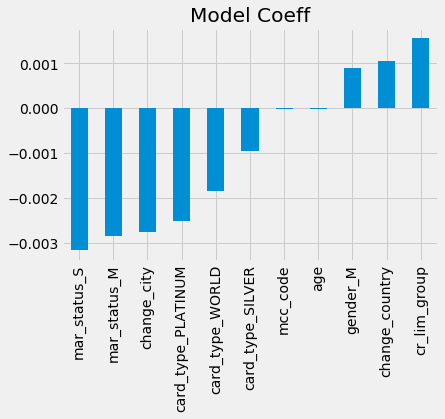

In [51]:
model = Ridge(alpha=0.05)
modelfit(model, X, y)
coef = pd.Series(model.coef_,X.columns).sort_values()
coef.plot(kind="bar", title="Model Coeff")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\sit


Model Report
RMSE : 0.02633
CV Score : Mean - 0.07271 | Std - 0.004027 | Min - 0.06693 | Max - 0.08356


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


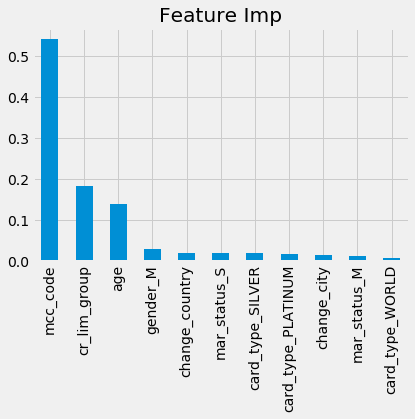

In [52]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
modelfit(model, X, y)
coef = pd.Series(model.feature_importances_,X.columns).sort_values(ascending=False)
coef.plot(kind="bar", title="Feature Imp")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\sit


Model Report
RMSE : 0.02692
CV Score : Mean - 0.06552 | Std - 0.00436 | Min - 0.05891 | Max - 0.07857


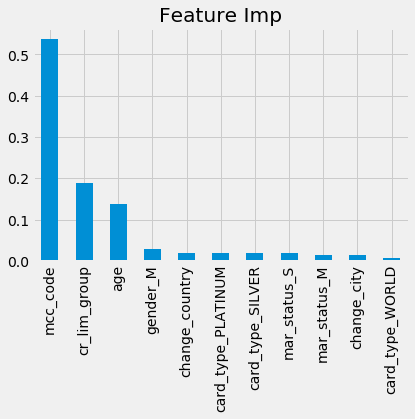

In [53]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1)
modelfit(model, X, y)
coef = pd.Series(model.feature_importances_,X.columns).sort_values(ascending=False)
coef.plot(kind="bar", title="Feature Imp")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\sit


Model Report
RMSE : 0.02633
CV Score : Mean - 0.06718 | Std - 0.004682 | Min - 0.06075 | Max - 0.08137


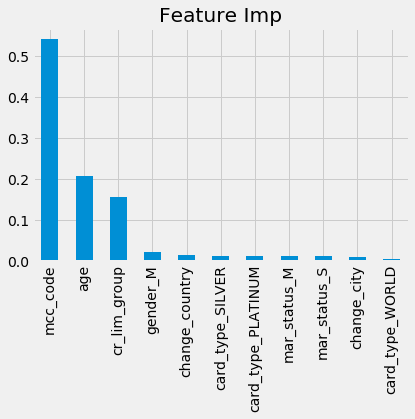

In [54]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor(n_jobs=-1)
modelfit(model, X, y)
coef = pd.Series(model.feature_importances_,X.columns).sort_values(ascending=False)
coef.plot(kind="bar", title="Feature Imp")

In [55]:
model_freq = ExtraTreesRegressor(n_jobs=-1)
model_freq.fit(X,y)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

# Generating 12th month data

In [77]:
test.head()

,customer_id,tran_id,tran_date,tran_amount,merchant_name,merchant_country,merchant_city,mcc_code,card_id,card_type,mar_status,age,gender,customer_country,cr_lim_group,customer_city,customer_id_new,customer_uid,Frequency
0,00015fc4-6fdc-4120-be42-a49e8bbe8cce,NaN,2019-03-20 00:00:00+00:00,31.25,The Jungle Terrace,india,bengaluru,5811,97c17dcc-4db8-4cb2-934d-a490ae51e1c7,PLATINUM,D,49,M,india,5000,bengaluru,10000020,e0430ada-2a60-491f-8229-c369bb2c5e38,1
1,00015fc4-6fdc-4120-be42-a49e8bbe8cce,NaN,2019-05-03 00:00:00+00:00,30.00,The Roost - Urban Bistro And Bar,india,delhi,5811,97c17dcc-4db8-4cb2-934d-a490ae51e1c7,PLATINUM,D,49,M,india,5000,bengaluru,10000020,e0430ada-2a60-491f-8229-c369bb2c5e38,1
2,00015fc4-6fdc-4120-be42-a49e8bbe8cce,NaN,2019-06-22 00:00:00+00:00,29.17,China Bowl,india,bengaluru,1004,97c17dcc-4db8-4cb2-934d-a490ae51e1c7,PLATINUM,D,49,M,india,5000,bengaluru,10000020,e0430ada-2a60-491f-8229-c369bb2c5e38,1
3,00015fc4-6fdc-4120-be42-a49e8bbe8cce,NaN,2019-07-22 00:00:00+00:00,21.67,87 - Premier Inn,india,bengaluru,1004,97c17dcc-4db8-4cb2-934d-a490ae51e1c7,PLATINUM,D,49,M,india,5000,bengaluru,10000020,e0430ada-2a60-491f-8229-c369bb2c5e38,1
4,00015fc4-6fdc-4120-be42-a49e8bbe8cce,NaN,2019-03-25 00:00:00+00:00,27.92,Empire Restaurant,india,bengaluru,1004,97c17dcc-4db8-4cb2-934d-a490ae51e1c7,PLATINUM,D,49,M,india,5000,bengaluru,10000020,e0430ada-2a60-491f-8229-c369bb2c5e38,1


In [79]:
submission = test[['customer_id', 'merchant_name', 'mcc_code']]
submission.head()

,customer_id,merchant_name,mcc_code
0,00015fc4-6fdc-4120-be42-a49e8bbe8cce,The Jungle Terrace,5811
1,00015fc4-6fdc-4120-be42-a49e8bbe8cce,The Roost - Urban Bistro And Bar,5811
2,00015fc4-6fdc-4120-be42-a49e8bbe8cce,China Bowl,1004
3,00015fc4-6fdc-4120-be42-a49e8bbe8cce,87 - Premier Inn,1004
4,00015fc4-6fdc-4120-be42-a49e8bbe8cce,Empire Restaurant,1004


In [80]:
test = test.drop(columns=['customer_id_new', 'tran_id', 'card_id', 'tran_amount',
                            'merchant_name', 'customer_uid'], axis=1)

In [83]:
test['change_city'] = test['merchant_city']==test['customer_city']
test['change_country'] = test['merchant_country']==test['customer_country']

In [84]:
dic = {True:0, False:1}
test['change_city'] = test['change_city'].apply(lambda x: dic[x])
test['change_country'] = test['change_country'].apply(lambda x: dic[x])

In [85]:
# dropping unnecessary columns
test = test.drop(columns=['customer_id', 'tran_date', 'merchant_country', 'merchant_city', 'customer_country', 'customer_city', 'Frequency'], axis=1)

In [88]:
cols = ['mar_status', 'card_type', 'gender']
for column in cols:
    test = pd.concat([test, pd.get_dummies(test[column], prefix=column, drop_first=True)],axis=1)
    test = test.drop([column], axis=1)

In [90]:
max_value = test['cr_lim_group'].max()
min_value = test['cr_lim_group'].min()
test['cr_lim_group'] = (test['cr_lim_group'] - min_value) / (max_value - min_value)

In [91]:
test.head()

,mcc_code,age,cr_lim_group,change_city,change_country,mar_status_M,mar_status_S,card_type_PLATINUM,card_type_SILVER,card_type_WORLD,gender_M
0,5811,49,0.0,0,0,0,0,1,0,0,1
1,5811,49,0.0,1,0,0,0,1,0,0,1
2,1004,49,0.0,0,0,0,0,1,0,0,1
3,1004,49,0.0,0,0,0,0,1,0,0,1
4,1004,49,0.0,0,0,0,0,1,0,0,1


In [92]:
pred = model_freq.predict(test)

In [94]:
submission['Frequency'] = pred

# Frequncy in normalized form

In [95]:
submission.head()

,customer_id,merchant_name,mcc_code,Frequency
0,00015fc4-6fdc-4120-be42-a49e8bbe8cce,The Jungle Terrace,5811,0.000000
1,00015fc4-6fdc-4120-be42-a49e8bbe8cce,The Roost - Urban Bistro And Bar,5811,0.010526
2,00015fc4-6fdc-4120-be42-a49e8bbe8cce,China Bowl,1004,0.000000
3,00015fc4-6fdc-4120-be42-a49e8bbe8cce,87 - Premier Inn,1004,0.000000
4,00015fc4-6fdc-4120-be42-a49e8bbe8cce,Empire Restaurant,1004,0.000000


In [96]:
submission.to_csv('output.csv', index=False)

In [97]:
output = pd.read_csv("output.csv")
output.head()

,customer_id,merchant_name,mcc_code,Frequency
0,00015fc4-6fdc-4120-be42-a49e8bbe8cce,The Jungle Terrace,5811,0.000000
1,00015fc4-6fdc-4120-be42-a49e8bbe8cce,The Roost - Urban Bistro And Bar,5811,0.010526
2,00015fc4-6fdc-4120-be42-a49e8bbe8cce,China Bowl,1004,0.000000
3,00015fc4-6fdc-4120-be42-a49e8bbe8cce,87 - Premier Inn,1004,0.000000
4,00015fc4-6fdc-4120-be42-a49e8bbe8cce,Empire Restaurant,1004,0.000000
